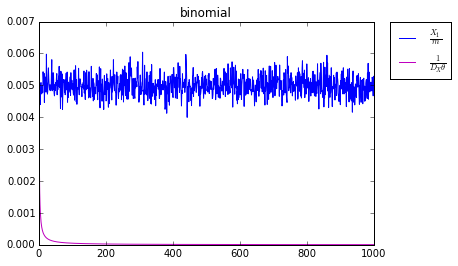

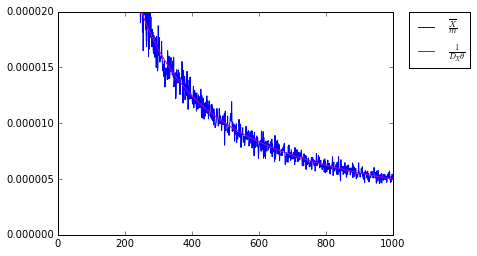

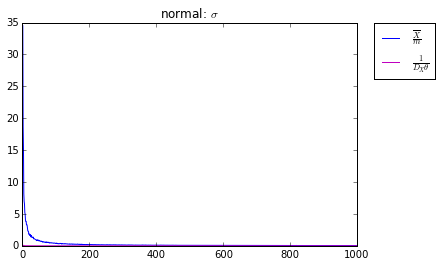

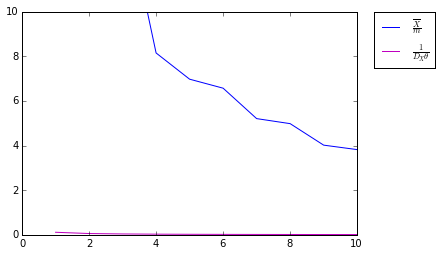

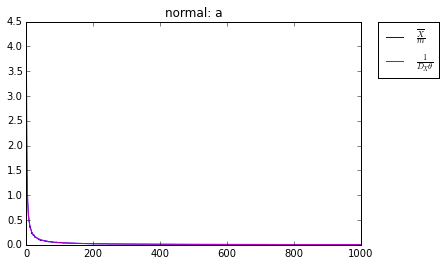

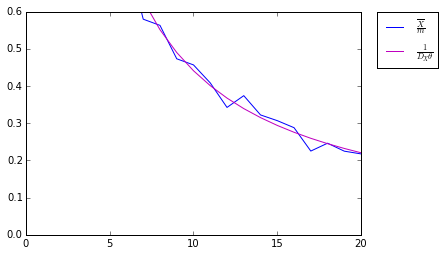

In [2]:
# Импортируем всякие библиотеки
import numpy as nmp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

N = 1000 #всего элементов в выборке
M = 50 #биномиальное распределение
P = nmp.random.beta(1.5, 2, 1)
arg = 2.1 #нормальное распределение
A = 3 
S = 500 #количество бутстрепных выборок

axis_x = nmp.linspace(1, N, N - 1)

# начнем с биномиального распределения
D_1 = []
D_2 = []
F = []

# расчитываем оценки, бутстрепные оценки дисперсии и информацию Фишера
for i in range(1, N):
    Estimation_1 = []
    Estimation_2 = []
    for j in  range(0, S):
        X = sts.binom.rvs(M, P, size=i)
        Estimation_1.append(nmp.mean(X) / M)  
        Estimation_2.append(X[0] / M)
    D_1.append(nmp.var(Estimation_1))
    D_2.append(nmp.var(Estimation_2))
    F.append((P * (1 - P)) / (i * M))

# строим графики
plt.plot(axis_x, D_2, '-b', label=r'$\frac{X_1}{m}$')
plt.plot(axis_x, F, '-m', label=r'$\frac{1}{D_{X}{\theta}}$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('binomial')
plt.show() 

plt.axis([0, N, 0, 0.00002])
plt.plot(axis_x, D_1, '-b', label=r'$\frac{\overline{X}}{m}$')
plt.plot(axis_x, F, '-m', label=r'$\frac{1}{D_{X}{\theta}}$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

# аналогично все для нормального распределения с неиз
D_1 = []
D_2 = []
F = []

for i in range(1, N):
    Estimation_1 = []
    Estimation_2 = []
    for j in  range(0, S):
        X = sts.norm.rvs(A, arg, size=i)
        Estimation_1.append(nmp.mean((X - A) ** 2))
        Estimation_2.append(nmp.median(X))
    D_1.append(nmp.var(Estimation_1))
    D_2.append(nmp.var(Estimation_2))
    F.append(1 / (i * 2 * (arg ** 2)))

plt.plot(axis_x, D_1, '-b', label=r'$\frac{\overline{X}}{m}$')
plt.plot(axis_x, F, '-m', label=r'$\frac{1}{D_{X}{\theta}}$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title(r'normal: $\sigma$')
plt.show()

# увеличим масштаб
plt.plot(axis_x, D_1, '-b', label=r'$\frac{\overline{X}}{m}$')
plt.axis([0, 10, 0, 10])
plt.plot(axis_x, F, '-m', label=r'$\frac{1}{D_{X}{\theta}}$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

# и ещё раз то же самое для нормального распределения
D_1 = []
D_2 = []
F = []

for i in range(1, N):
    Estimation_1 = []
    Estimation_2 = []
    for j in  range(S):
        X = sts.norm.rvs(A, arg, size=i) 
        Estimation_1.append(nmp.mean(X))
        Estimation_2.append(nmp.median(X))
    D_1.append(nmp.var(Estimation_1))
    D_2.append(nmp.var(Estimation_2))
    F.append((arg ** 2) / i)

plt.plot(axis_x, D_1, '-b', label=r'$\frac{\overline{X}}{m}$')
plt.plot(axis_x, F, '-m', label=r'$\frac{1}{D_{X}{\theta}}$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title(r'normal: a')
plt.show() 

# увеличим масштаб
plt.axis([0, 20, 0, 0.6])
plt.plot(axis_x, D_1, '-b', label=r'$\frac{\overline{X}}{m}$')
plt.plot(axis_x, F, '-m', label=r'$\frac{1}{D_{X}{\theta}}$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show() 